<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/proyecto/proyecto_IHL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto - Clasificación de frutas por redes neuronales
Por Isaías Hernández Lares - Machine learning 2023

# Contenido:




## [Introducción](#introduccion)
## Desarrollo
### * [Carga de información](#carga_de_informacion)
  - [Importarción de librerías](#importacion)
  - [Carga de datasets](#dataset)

### * [Revisión de la información](#revision)

### * [Construcción del modelo](#contruccion)
  - [Predicción del modelo](#modelo_prediccion)
  - [Construcción del modelo](modelo_construccion)
  - [Entrenamiento del modelo](modelo_entrenamiento)

### * [Mejoramiento de los hiperparametros](#mejoramiento)
  - [Arquitectura de red neuronal](#arquitectura)
  - [Guardar el modelo final](#guardar)

### * [Aplicación del modelo a dataset mayor](#aplicacion)

## [Conclusión](#conclusion)


<a class="anchor" id="carga_de_informacion"></a>
# Introducción

<a class="anchor" id="desarrollo"></a>
# Desarrollo

<a class="anchor" id="carga_de_informacion"></a>
# Carga de información

<a class="anchor" id="importacion"></a>
* Importación de librerías

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from pathlib import Path
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

<a class="anchor" id="dataset"></a>
*  Carga de datasets



In [16]:
drive_path = "/content/drive/MyDrive/ML2023/fruits_prueba"
drive_path = Path(drive_path)

train_set = image_dataset_from_directory(
    drive_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=1,
    validation_split=0.1,
    subset="training",
)

validation_set = image_dataset_from_directory(
    drive_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=1,
    validation_split=0.1,
    subset="validation",
)

Found 10731 files belonging to 4 classes.
Using 9658 files for training.
Found 10731 files belonging to 4 classes.
Using 1073 files for validation.


<a class="anchor" id="revision"></a>
# Revisión de la infromación

"The database used in this study is comprising of 44406 fruit images, which we collected in a period of 6 months. The images where made with in our lab’s environment under different scenarios which we mention below. We captured all the images on a clear background with resolution of 320×258 pixels. We used HD Logitech web camera to took the pictures. During collecting this database, we created all kind of challenges, which, we have to face in real-world recognition scenarios in supermarket and fruit shops such as light, shadow, sunshine, pose variation, to make our model robust for, it might be necessary to cope with illumination variation, camera capturing artifacts, specular reflection shading and shadows. We tested our model’s robustness in all scenarios and it perform quit well."

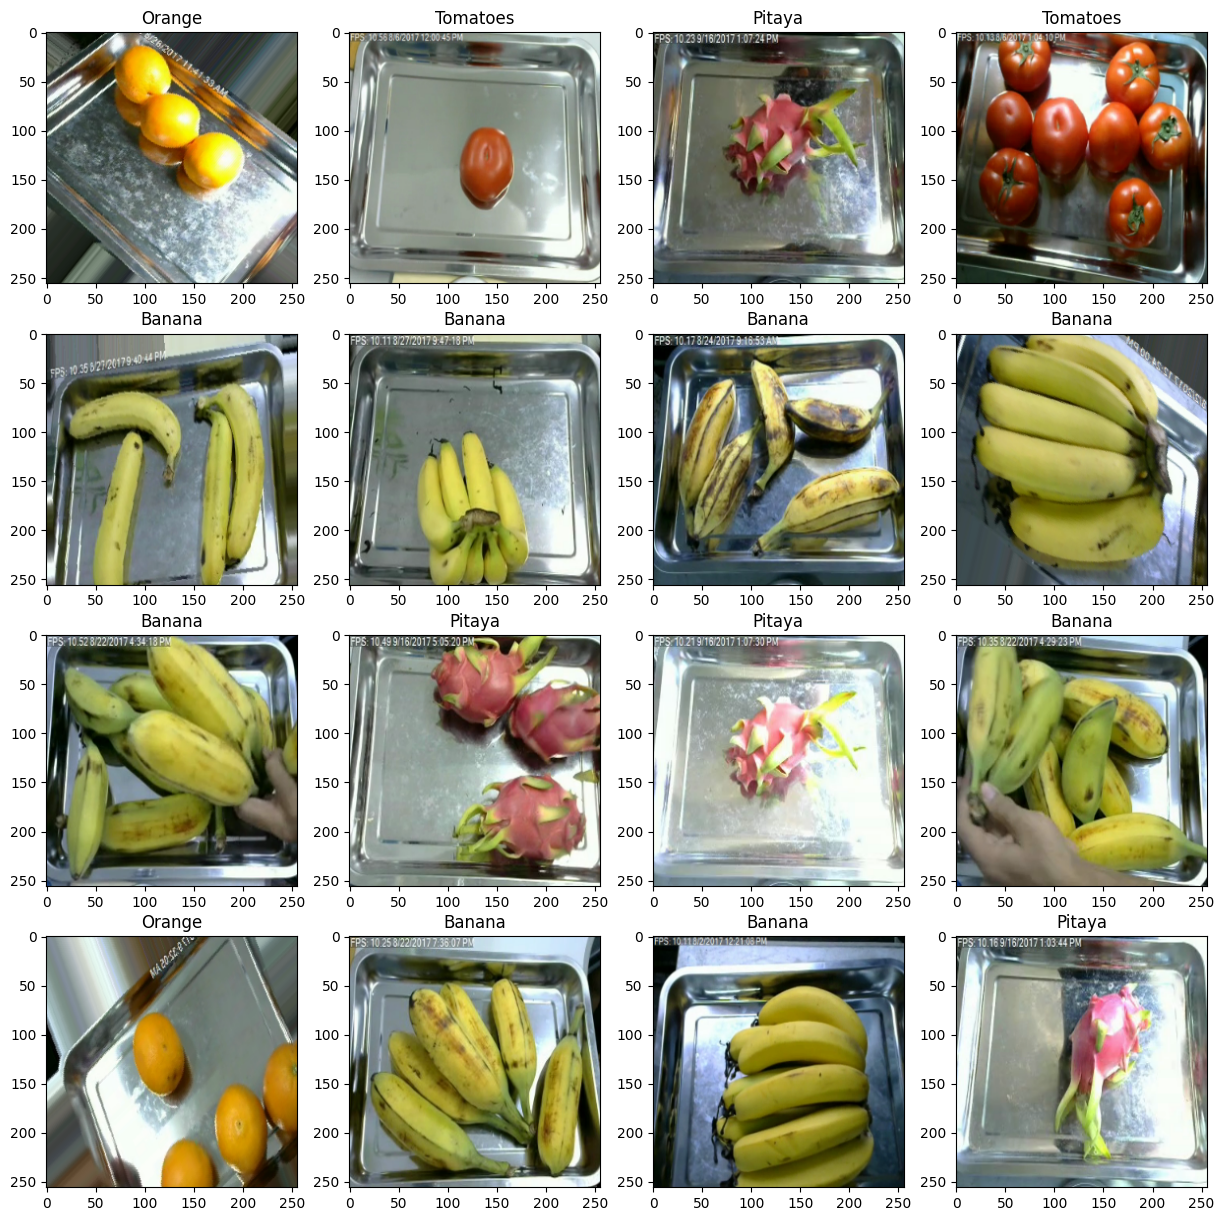

In [11]:
class_names = train_set.class_names

plt.figure(figsize=(15, 15))
for images, labels in train_set.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

<a class="anchor" id="construccion"></a>
#  Construcción del modelo

La construcción del modelo tiene 3 partes fundamentales, la arquitectura, el compilador y el entrenamiento.

Para conseguir una red neuronal útil, planteamos una red neuronal incial que se mejorará en la selección de hiperparametros. Seleccionamos como arquitectura una red neuronal convolucional sencilla arbitraria: 1 capa de convolución con 1 kernel de 3x3, 1 capa de pooling, 1 capa densa de 8 unidades y 1 capa softmax para clasificación de 4 opciones. Las funciones de activación relu son muy utlizadas en redes neuronales por su enntrenamiento eficiente de las redes neuronales.

In [46]:
model = Sequential([
    layers.Conv2D(1, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 1)       28        
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 63, 63, 1)         0         
 ng2D)                                                           
                                                                 
 flatten_21 (Flatten)        (None, 3969)              0         
                                                                 
 dense_48 (Dense)            (None, 8)                 31760     
                                                                 
 dense_49 (Dense)            (None, 4)                 36        
                                                                 
Total params: 31824 (124.31 KB)
Trainable params: 31824 (124.31 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

El método compliador requiere 3 argumentos principales: optimizador, función de costo (loss) y métricas para evaluar durante el entrenamiento del modeo. Como método de optimización se selecciona el método "adam" como mencionan Duchi, J., Hazan, E., & Singer, Y. [2001] "Research has shown that Adam has demonstrated superior experimental performance over all the other optimizers such as AdaGrad, SGD, RMSP, etc", no hay razón para no usar adam. Como función costo seleccionamos "categorical_crossentropy" que es comúnmente utilizada para problemas de clasificación con múltiples clases

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<a class="anchor" id="modelo_entrenamiento"></a>
Entrenamiento del modelo

Para entrenar un modelo se llama al método .fit() que recibe de argumentos los datasets de entrenamiento y validación, número de épocas, tamaño de los batchs, entre otros. Seleccionamos 10 épocas como número arbitrario y 32 del tamaño de batch al igual que en la carga de datasets. Es posible guardar el historial del entrenamiento para obtener la curva de aprendizaje del modelo.

In [48]:
history = model.fit(
    train_set,
    epochs=10,
    batch_size = 32,
    validation_data=validation_set,)

Epoch 1/10
302/302 [==============================] - 99s 319ms/step - loss: 1.6227 - accuracy: 0.2718 - val_loss: 1.3800 - val_accuracy: 0.2842
Epoch 2/10
302/302 [==============================] - 92s 302ms/step - loss: 1.3783 - accuracy: 0.2740 - val_loss: 1.3788 - val_accuracy: 0.2740
Epoch 3/10
302/302 [==============================] - 92s 301ms/step - loss: 1.3775 - accuracy: 0.2779 - val_loss: 1.3786 - val_accuracy: 0.2740
Epoch 4/10
302/302 [==============================] - 92s 302ms/step - loss: 1.3773 - accuracy: 0.2831 - val_loss: 1.3786 - val_accuracy: 0.2740
Epoch 5/10
302/302 [==============================] - 88s 287ms/step - loss: 1.3773 - accuracy: 0.2831 - val_loss: 1.3787 - val_accuracy: 0.2740
Epoch 6/10
302/302 [==============================] - 92s 301ms/step - loss: 1.3773 - accuracy: 0.2811 - val_loss: 1.3787 - val_accuracy: 0.2740
Epoch 7/10
302/302 [==============================] - 92s 302ms/step - loss: 1.3773 - accuracy: 0.2810 - val_loss: 1.3787 - val_ac

Graficamos las curvas de aprendizaje

In [ ]:
def graficar_loss_accuracy(history):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  ax[1].plot(history.history['accuracy'])
  ax[1].plot(history.history['val_accuracy'])
  ax[1].set_title('model accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(['Train', 'Validation'], loc='upper left')

  # summarize history for loss
  ax[0].plot(history.history['loss'])
  ax[0].plot(history.history['val_loss'])
  ax[0].set_title('model loss')
  ax[0].set_ylabel('loss')
  ax[0].set_xlabel('epoch')
  ax[0].legend(['Train', 'Validation'], loc='lower right')

graficar_loss_accuracy(history)

El rendimiento de la red neuronal inicial es muy malo. Arreglaremos esto mediante la mejora de los hiperparametros.

<a class="anchor" id="mejoramiento"></a>
# Mejoramiento de los hiperparametros

La optimización de hiperparametros de una red neuronal es un paso crucial para mejorar su rendimiento. Para su mejora se han desarrollado métodos iterativos. Entre estos hay búsqueda por cuadrícula, búsqueda aleatoria, búsqueda manual o búsqueda aumática. Cada método tiene sus ventajas y desventajas, y la elección del enfoque adecuado depende del tiempo disponible o la cantidad de recursos computacionales.

Utilizamos busqueda aleatoria y manual de los hiperparametros para su ajuste. Se utilizan 5 épocas para reducir el tiempo de entrenamiento. Técnicas automáticas se pueden implementar en keras usando "keras_tuner" donde se pueden aplicar distintos métodos para su optimización.

<a class="anchor" id="arquitectura"></a>
Arquitectura de red neuronal

Obtenemos una presición de ~0.9 y ~0.8 con loss de ~0.19 y ~0.83 en entrenamiento y validación respectivamente. Notamos que tenemos una alto bias. Nos enfocaremos en eliminar el problema de bias primero. Para solucionar este problema hay varias estrategias que podríamos implementar como: aumentar el tamaño y complejidad de la red neuronal, entrenar por más tiempo o intentar otra arquitectura. Intentaremos aumetando las capas de la red neuronal, añadiendo más capas de convoluciones y maxpooling.

In [23]:
model = tf.keras.Sequential([
    layers.Conv2D(1, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=5,
    batch_size = 32,
    validation_data=validation_set,)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 1)       28        
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 1)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 1)         10        
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 1)         0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 900)               0         
                                                                 
 dense_17 (Dense)            (None, 8)                

La presición aumenta. La nueva arquitectura resulta ser mejor clasificando que la anterior. Ahora intentamos añadiendo una capa densa para seguir mejorando.

In [24]:
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=5,
    batch_size = 32,
    validation_data=validation_set,)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 57600)             0         
                                                                 
 dense_19 (Dense)            (None, 8)                

Nuevamente el desempeño ha empeorado y los parámetros a ajustar creció absurdamente. Para reducir estos parametros reducimos la cantidad de kernels usados en las capas convolucionales y añadimos otra densa para intentar mejorar el rendimiento.

In [28]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=5,
    batch_size = 32,
    validation_data=validation_set,)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 28800)             0         
                                                                 
 dense_29 (Dense)            (None, 8)               

En este punto nos damos cuenta que agregar más capas o reducir los parámetros, aunque reducen significativamente el tiempo de entrenamiento, no mejorar la presición de la red neuronal. Probamos añadir más unidades en las capas densas aumentado el tamaño de la red neuronal, estrategia sugerida anteriormente.

In [30]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=5,
    batch_size = 32,
    validation_data=validation_set,)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 32)      

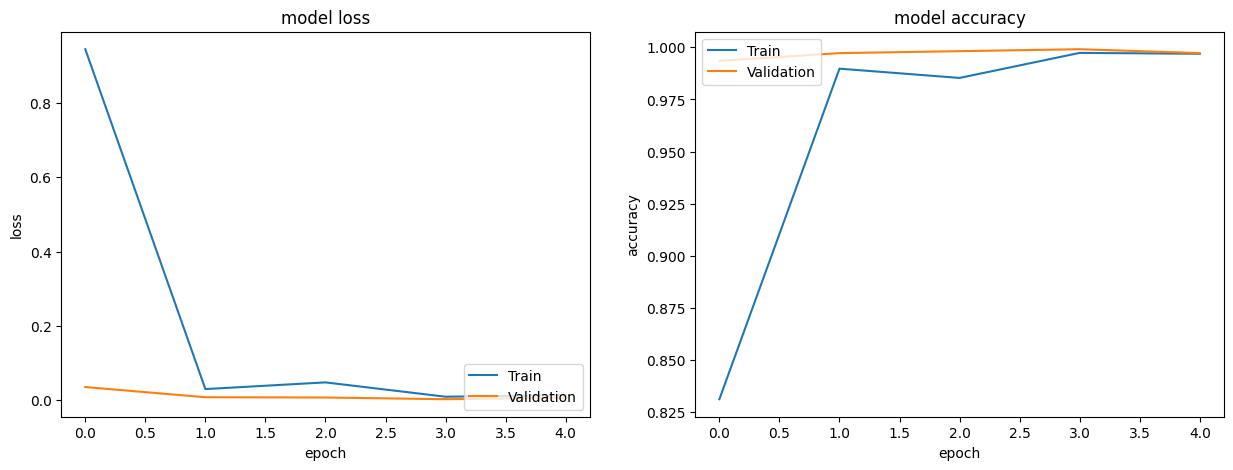

In [41]:
graficar_loss_accuracy(history)

Al añadir más unidades a la primer capa densa obtenemos un a presición de ~99 en entrenamiento y validación. Restulramos con problema de varianza a cambio de eliminar el problema con el bias. Entre las estrategias para reducir la varianza hay: aumento de datos, reducción de la complejidad de la red neuronal, regularización o usar una arquitectura mejor. Las gráficas de presición y

La regularización es una estrategía no útil cuando se trata de redes neuronales convolucionales, como menciona Yarin Gal & Zoubin Ghahramani [2015], "The problem then is how to use CNNs with small data as CNNs are known to over fit quickly. This is because even though dropout is effective in inner product layers, when it is placed over kernels it leads to diminished results."

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 7, 7, 16)        

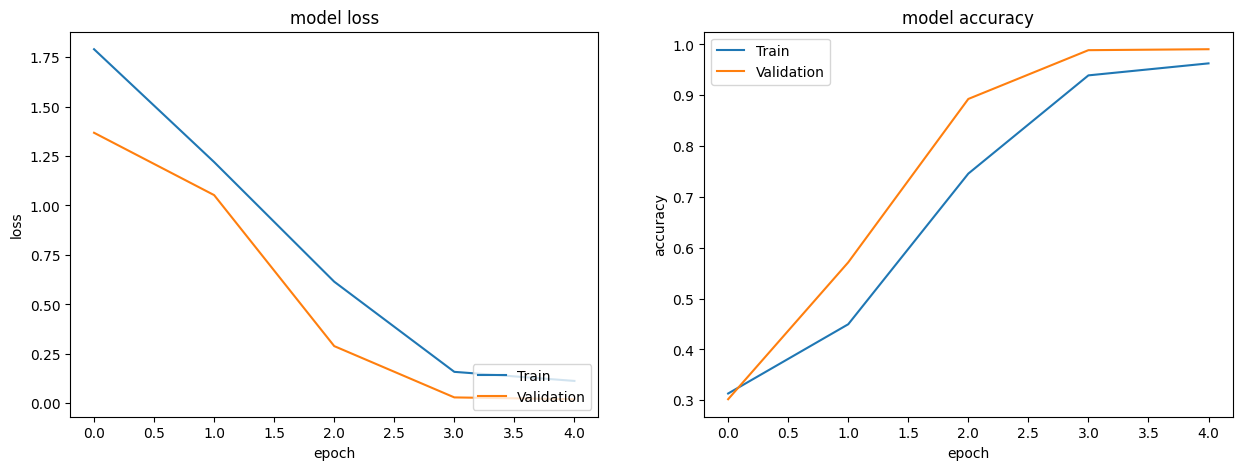

In [43]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=5,
    batch_size = 32,
    validation_data=validation_set,)

graficar_loss_accuracy(history)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 7, 7, 16)        

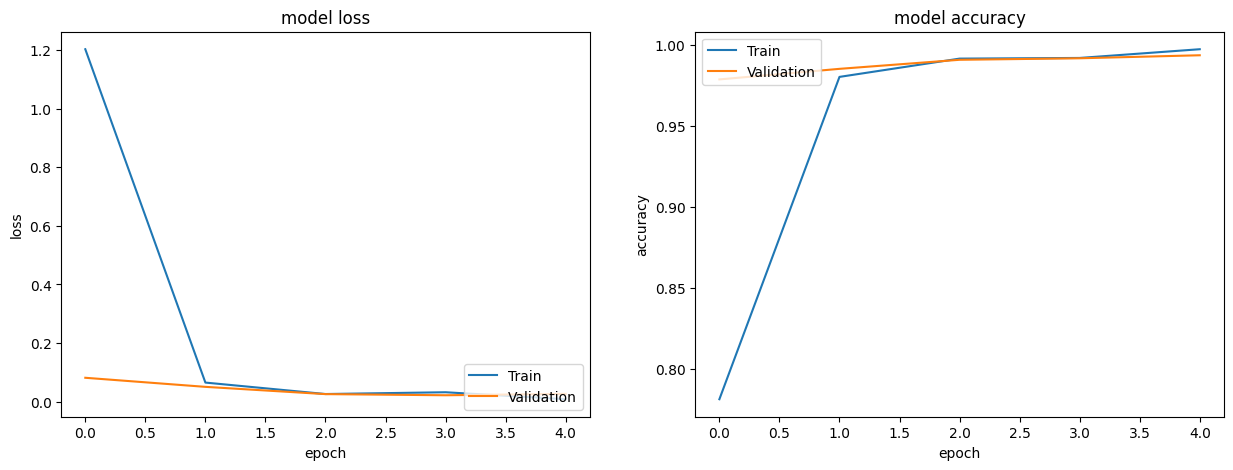

In [44]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(30, activation='relu'),
    #layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_set,
    epochs=5,
    batch_size = 32,
    validation_data=validation_set,)

graficar_loss_accuracy(history)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Aplicar el aumento de datos al conjunto de entrenamiento
augmented_train_dataset = train_set.map(lambda x, y: (datagen.flow(x, batch_size=32), y)).unbatch()


<a class="anchor" id="guardar"></a>
 Guardar el modelo

In [ ]:
model.save('modelo_cnn_ihl_proyecto_ml2023.h5')

<a class="anchor" id="conclusion"></a>
# Conclusión

 <a class="anchor" id="referencias"></a>
 # Referencias



* Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive subgradient methods for online learning and stochastic optimization. Journal of machine learning research.

* Gal, Y., & Ghahramani, Z. (2015). Bayesian convolutional neural networks with Bernoulli approximate variational inference. arXiv preprint arXiv:1506.02158.